In [34]:
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
orders = pd.read_csv('Downloads/Brazilinaecommercedataset/olist_orders_dataset.csv')

#### 1) How many orders were delivered vs other status?

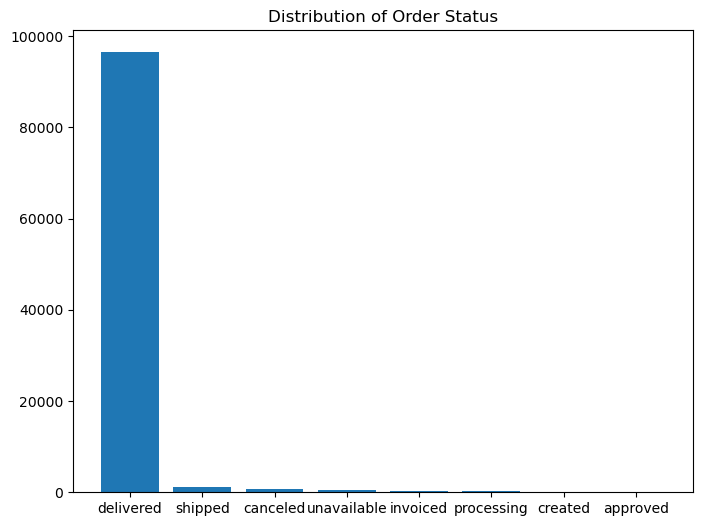

In [39]:
orderstatus = orders['order_status'].value_counts()
plt.figure(figsize=(8, 6))

plt.bar(orderstatus.index, orderstatus)
plt.title('Distribution of Order Status')
plt.show()

In [2]:
filenames = [
"Downloads/Brazilinaecommercedataset/olist_customers_dataset.csv",
"Downloads/Brazilinaecommercedataset/olist_sellers_dataset.csv",
"Downloads/Brazilinaecommercedataset/olist_order_reviews_dataset.csv",
"Downloads/Brazilinaecommercedataset/olist_order_items_dataset.csv",
"Downloads/Brazilinaecommercedataset/olist_products_dataset.csv",
"Downloads/Brazilinaecommercedataset/olist_geolocation_dataset.csv",
"Downloads/Brazilinaecommercedataset/product_category_name_translation.csv",
"Downloads/Brazilinaecommercedataset/olist_orders_dataset.csv",
"Downloads/Brazilinaecommercedataset/olist_order_payments_dataset.csv"
]

In [3]:
dfs = {}
for file in filenames:
    name = file.split("/")[-1].split(".")[0]
    dfs[name] = pd.read_csv(file)

In [4]:
merged_df = pd.merge(dfs['olist_orders_dataset'],dfs['olist_order_items_dataset'],on='order_id')

In [5]:
merged_df = pd.merge(merged_df, dfs['olist_customers_dataset'],on='customer_id')

In [6]:
merged_df = pd.merge(merged_df, dfs['olist_products_dataset'],on='product_id')

In [7]:
merged_df = pd.merge(merged_df, dfs['olist_order_payments_dataset'],on='order_id')

In [8]:
merged_df = pd.merge(merged_df, dfs['olist_order_reviews_dataset'],on='order_id')

In [9]:
merged_df = pd.merge(merged_df, dfs['olist_sellers_dataset'],on='seller_id')

In [10]:
merged_df = pd.merge(merged_df, dfs['product_category_name_translation'],on='product_category_name')

In [11]:
merged_df.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,9350,maua,SP,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,9350,maua,SP,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,9350,maua,SP,housewares
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1,87285b34884572647811a353c7ac498a,...,b46f1e34512b0f4c74a72398b03ca788,4,NaN,Deveriam embalar melhor o produto. A caixa vei...,2017-08-19 00:00:00,2017-08-20 15:16:36,9350,maua,SP,housewares
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1,87285b34884572647811a353c7ac498a,...,dc90f19c2806f1abba9e72ad3c350073,5,NaN,"Só achei ela pequena pra seis xícaras ,mais é ...",2017-08-08 00:00:00,2017-08-08 23:26:23,9350,maua,SP,housewares


In [22]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113193 entries, 0 to 115607
Data columns (total 38 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       113193 non-null  object 
 1   customer_id                    113193 non-null  object 
 2   order_status                   113193 non-null  object 
 3   order_purchase_timestamp       113193 non-null  object 
 4   order_approved_at              113193 non-null  object 
 5   order_delivered_carrier_date   113193 non-null  object 
 6   order_delivered_customer_date  113193 non-null  object 
 7   order_estimated_delivery_date  113193 non-null  object 
 8   order_item_id                  113193 non-null  int64  
 9   product_id                     113193 non-null  object 
 10  seller_id                      113193 non-null  object 
 11  shipping_limit_date            113193 non-null  object 
 12  price                          1131

In [12]:
merged_df.duplicated().sum()

0

In [13]:
merged_df.isnull().sum() / len(merged_df) * 100

order_id                          0.000000
customer_id                       0.000000
order_status                      0.000000
order_purchase_timestamp          0.000000
order_approved_at                 0.012110
order_delivered_carrier_date      1.033657
order_delivered_customer_date     2.075963
order_estimated_delivery_date     0.000000
order_item_id                     0.000000
product_id                        0.000000
seller_id                         0.000000
shipping_limit_date               0.000000
price                             0.000000
freight_value                     0.000000
customer_unique_id                0.000000
customer_zip_code_prefix          0.000000
customer_city                     0.000000
customer_state                    0.000000
product_category_name             0.000000
product_name_lenght               0.000000
product_description_lenght        0.000000
product_photos_qty                0.000000
product_weight_g                  0.000865
product_len

In [14]:
# drop missing values column with more than 50% missing values
merged_df = merged_df.dropna(thresh=len(merged_df) * 0.5, axis=1)

In [15]:
# drop rows with missing values
merged_df = merged_df.dropna()

In [16]:
pd.set_option('display.max_columns', None)
merged_df.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_creation_date,review_answer_timestamp,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,1,credit_card,1,18.12,a54f0611adc9ed256b57ede6b6eb5114,4,2017-10-11 00:00:00,2017-10-12 03:43:48,9350,maua,SP,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,3,voucher,1,2.00,a54f0611adc9ed256b57ede6b6eb5114,4,2017-10-11 00:00:00,2017-10-12 03:43:48,9350,maua,SP,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,2,voucher,1,18.59,a54f0611adc9ed256b57ede6b6eb5114,4,2017-10-11 00:00:00,2017-10-12 03:43:48,9350,maua,SP,housewares
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:16,29.99,7.78,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,1,credit_card,3,37.77,b46f1e34512b0f4c74a72398b03ca788,4,2017-08-19 00:00:00,2017-08-20 15:16:36,9350,maua,SP,housewares
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-08 18:37:31,29.99,7.78,ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,1,credit_card,1,37.77,dc90f19c2806f1abba9e72ad3c350073,5,2017-08-08 00:00:00,2017-08-08 23:26:23,9350,maua,SP,housewares


In [17]:
merged_df['review_score'].value_counts()


review_score
5    65145
4    21811
1    12865
3     9533
2     3839
Name: count, dtype: int64

#### 2) Which category of products has top score and which has lowest scores?

In [46]:
category_scores = merged_df.groupby('product_category_name_english')['review_score'].mean().sort_values(ascending=False)
top_score = pd.DataFrame(category_scores.head(5))
#lowest_score = pd.DataFrame(category_scores.tail(5))
print(top_score)

                                       review_score
product_category_name_english                      
fashion_childrens_clothes                  5.000000
cds_dvds_musicals                          4.642857
books_imported                             4.525424
books_general_interest                     4.501838
small_appliances_home_oven_and_coffee      4.453333


In [47]:
lowest_score = pd.DataFrame(category_scores.tail(5))
print(lowest_score)

                               review_score
product_category_name_english              
fashion_male_clothing              3.649635
home_comfort_2                     3.642857
office_furniture                   3.553204
diapers_and_hygiene                3.378378
security_and_services              2.500000


#### 3) Categories with most orders

In [49]:
categories_orders = merged_df.groupby("product_category_name_english")["order_id"].count().reset_index().sort_values("order_id", ascending = False).head(5)
print(categories_orders)

   product_category_name_english  order_id
7                 bed_bath_table     11684
43                 health_beauty      9749
65                sports_leisure      8734
39               furniture_decor      8554
15         computers_accessories      7926


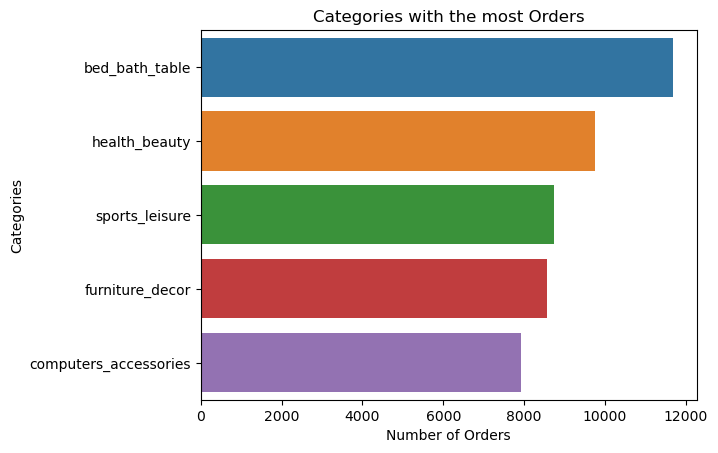

In [52]:
sns.barplot(x = "order_id", y = "product_category_name_english", data = categories_orders)

plt.xlabel("Number of Orders")
plt.ylabel("Categories")
plt.title("Categories with the most Orders")
plt.show()

#### 4) Sales Trends Over Time

In [64]:
merged_df['order_purchase_timestamp'] = pd.to_datetime(merged_df['order_purchase_timestamp'])

merged_df['year_to_month'] = merged_df['order_purchase_timestamp'].dt.to_period('M')
print(merged_df['year_to_month'])


0         2017-10
1         2017-10
2         2017-10
3         2017-08
4         2017-08
           ...   
115602    2018-07
115603    2018-07
115605    2018-05
115606    2018-06
115607    2018-08
Name: year_to_month, Length: 113193, dtype: period[M]


year_to_month
2016-10     334
2016-12       1
2017-01     955
2017-02    1890
2017-03    3010
2017-04    2622
2017-05    4173
2017-06    3639
2017-07    4666
2017-08    4973
2017-09    4920
2017-10    5382
2017-11    8692
2017-12    6261
2018-01    8146
2018-02    7670
2018-03    8184
2018-04    7987
2018-05    8017
2018-06    7262
2018-07    7114
2018-08    7295
Freq: M, dtype: int64


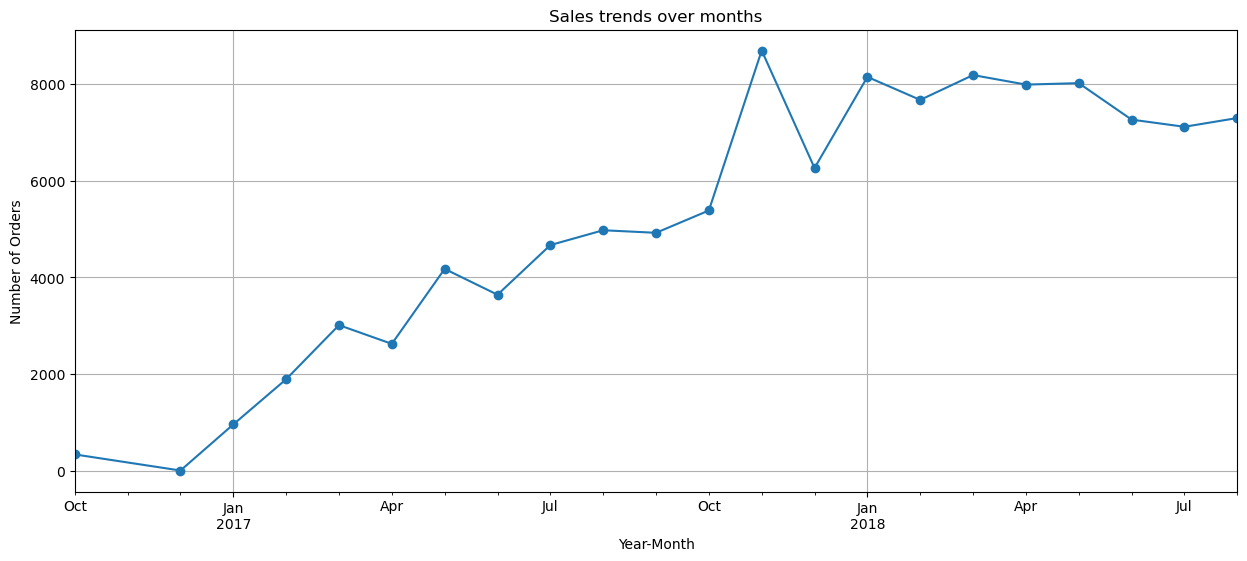

In [69]:
sales_trends = merged_df.groupby('year_to_month').size()
print(sales_trends)
plt.figure(figsize=(15, 6))
sales_trends.plot(kind='line', marker='o')
plt.title('Sales trends over months')
plt.xlabel('Year-Month')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.show()

#### Gradually sales is increasing but there is a peak in November 2017.

#### 5) Geographic Distribution of Sales by State

In [70]:
sales_state = merged_df.groupby('customer_state').size().sort_values(ascending=False)
print(sales_state)

customer_state
SP    47812
RJ    14566
MG    13216
RS     6310
PR     5790
SC     4143
BA     3844
DF     2397
GO     2305
ES     2268
PE     1795
CE     1480
MT     1060
PA     1056
MS      837
MA      807
PB      605
RN      553
PI      541
AL      438
SE      382
TO      329
RO      274
AM      167
AC       92
AP       82
RR       44
dtype: int64


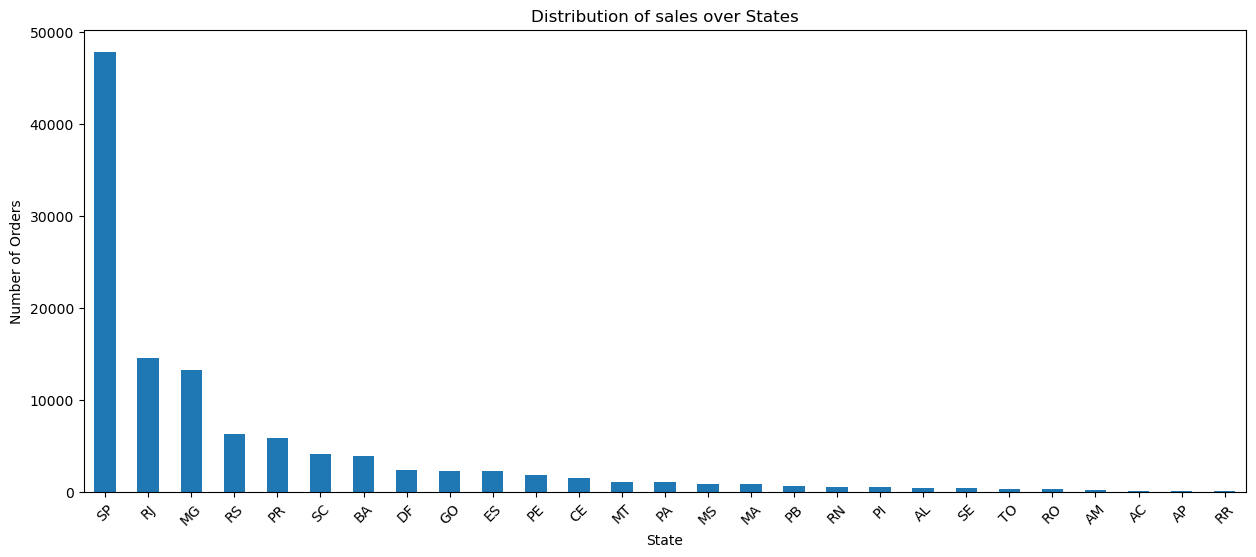

In [75]:
plt.figure(figsize=(15, 6))
sales_state.plot(kind='bar')
plt.title('Distribution of sales over States')
plt.xlabel('State')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

,order_purchase_timestamp,order_item_id,price,freight_value,customer_zip_code_prefix,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_installments,payment_value,review_score,seller_zip_code_prefix
count,113193,113193.000000,113193.000000,113193.000000,113193.000000,113193.000000,113193.000000,113193.000000,113193.000000,113193.000000,113193.000000,113193.000000,113193.000000,113193.000000,113193.000000,113193.000000,113193.000000
mean,2018-01-01 07:46:22.707817728,1.195065,119.846650,20.002595,35085.687437,48.802894,784.727183,2.206833,2106.236075,30.278091,16.597422,23.099679,1.090818,2.943680,171.557922,4.082505,24525.441352
min,2016-10-03 09:44:50,1.000000,0.850000,0.000000,1003.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1.000000,0.000000,0.000000,1.000000,1001.000000
25%,2017-09-13 14:12:25,1.000000,39.900000,13.080000,11310.000000,42.000000,346.000000,1.000000,300.000000,18.000000,8.000000,15.000000,1.000000,1.000000,60.850000,4.000000,6429.000000
50%,2018-01-20 09:22:45,1.000000,74.900000,16.320000,24315.000000,52.000000,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000,1.000000,2.000000,107.960000,5.000000,13660.000000
75%,2018-05-05 13:57:15,1.000000,132.980000,21.190000,58865.000000,57.000000,982.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,1.000000,4.000000,189.150000,5.000000,28495.000000
max,2018-08-29 15:00:37,21.000000,6735.000000,409.680000,99980.000000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,26.000000,24.000000,13664.080000,5.000000,99730.000000
std,NaN,0.687526,181.079901,15.711728,29867.822574,10.016138,650.332251,1.718331,3765.207714,16.145105,13.437427,11.735929,0.686674,2.779181,264.197701,1.345924,27648.963528


#### 6) Average delivery time of product

In [23]:
#Converting object to datetime
merged_df['order_purchase_timestamp'] = pd.to_datetime(merged_df['order_purchase_timestamp'], format='%Y-%m-%d %H:%M:%S')
merged_df['order_delivered_customer_date'] = pd.to_datetime(merged_df['order_delivered_customer_date'], format='%Y-%m-%d %H:%M:%S')

In [24]:

#Calculating delivery time for all orders:
deliveryTime = (merged_df['order_delivered_customer_date'] - merged_df['order_purchase_timestamp'])

#Convert the timedeltas to seconds
deliveryTime_Seconds = deliveryTime.apply(lambda x: x.total_seconds())

#Convert seconds to days by dividing by the number of seconds in a day (86400 seconds per day)
merged_df['deliveryTime_Days'] = round(deliveryTime_Seconds/86400, 2)

#Summarizing the delivery time:
merged_df['deliveryTime_Days'].describe()



count    113193.000000
mean         12.441694
std           9.355858
min           0.530000
25%           6.740000
50%          10.190000
75%          15.500000
max         208.350000
Name: deliveryTime_Days, dtype: float64

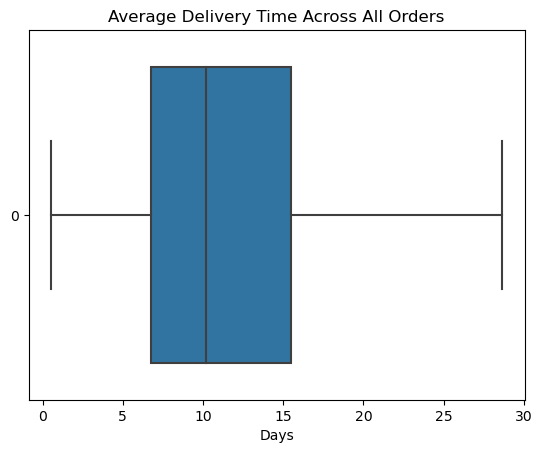

In [30]:
sns.boxplot(merged_df.deliveryTime_Days, orient = 'h', showfliers = False)
plt.xlabel('Days')
plt.title('Average Delivery Time Across All Orders')
plt.show()

##### The average delivery time is between 7 to 16 days.

#### 7) how many orders were delayed?

In [33]:
order_status = merged_df['order_status'].value_counts()
print(order_status)


order_status
delivered    113186
canceled          7
Name: count, dtype: int64
